**SET UP AND LOAD DATA**

In [9]:
# Import necessary libraries for data manipulation, metrics, and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# --- Load the dataset ---
# NOTE: Replace 'your-dataset-name' with the name Kaggle assigns to your uploaded data folder.
file_path = '/kaggle/input/final-result/helios_adaptive_results_1400.csv'

try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    print("First 5 rows of the data:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    print("Please make sure you have uploaded the CSV file to Kaggle and updated the 'file_path' variable correctly.")
    # As a fallback for demonstration, create a dummy dataframe
    df = pd.DataFrame()

# --- Data Preprocessing ---
# Ensure the ground_truth and prediction columns are in boolean format for calculations
if not df.empty:
    df['ground_truth'] = df['ground_truth'].astype(bool)
    df['ensemble_prediction'] = df['ensemble_prediction'].astype(bool)

    # Set a professional plot style suitable for papers
    sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)

File loaded successfully!
First 5 rows of the data:
                                               query  \
0  Write a short opening paragraph for a story ab...   
1       Analyze the causes of the French Revolution?   
2  Regarding The signing of the Magna Carta, was ...   
3       Analyze the causes of the French Revolution?   
4  Explain in detail the decline of the Mayan civ...   

                                              answer  ground_truth  \
0  The story of a ghost who attends night classes...         False   
1  The primary cause for the causes of the French...          True   
2  The signing of the Magna Carta was a pivotal m...          True   
3  The causes of the french revolution can be att...         False   
4  The decline of the mayan civilization can be a...         False   

     processing_mode  ensemble_prediction  ensemble_confidence  \
0  mitigation_guided                 True             1.000000   
1    hybrid_research                 True             0.99

**GENERATE CONFUSION MATRICES FOR EACH PROCESSING MODE**


Generating Confusion Matrices for modes: ['mitigation_guided' 'hybrid_research' 'detection_only']


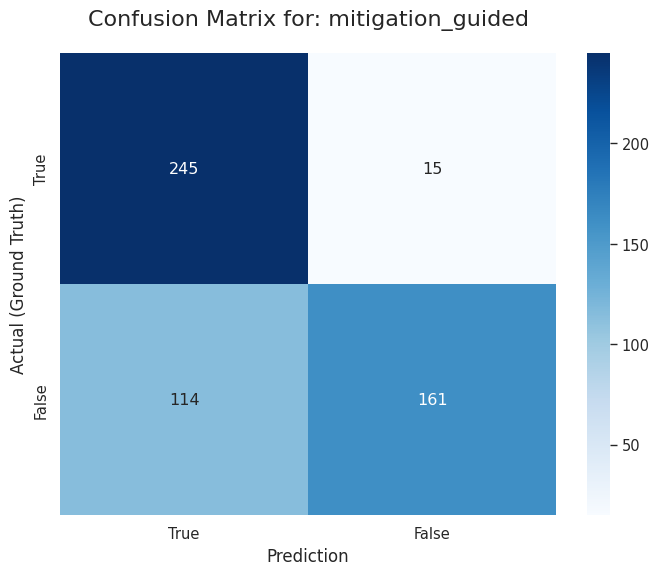

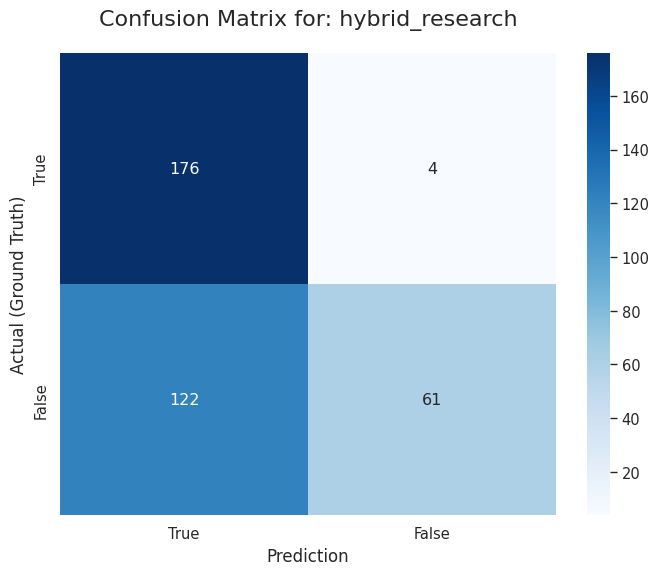

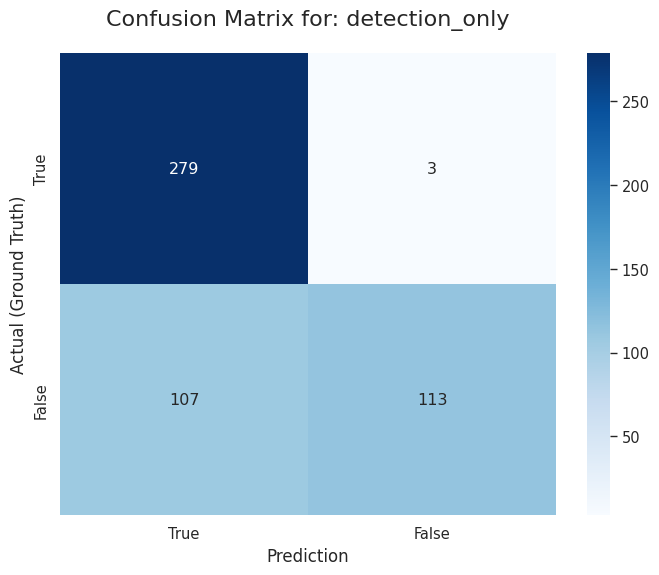

In [10]:
if not df.empty:
    # Get the unique modes from the 'processing_mode' column
    processing_modes = df['processing_mode'].unique()

    print(f"\nGenerating Confusion Matrices for modes: {processing_modes}")

    for mode in processing_modes:
        # Filter the dataframe for the current processing mode
        df_mode = df[df['processing_mode'] == mode]

        # Extract the actual and predicted labels
        y_true = df_mode['ground_truth']
        y_pred = df_mode['ensemble_prediction']

        # Calculate the confusion matrix
        cm = confusion_matrix(y_true, y_pred, labels=[True, False])
        
        # Create a figure for the plot
        plt.figure(figsize=(8, 6))
        
        # Create the heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['True', 'False'],
                    yticklabels=['True', 'False'])
        
        # Add labels and title for clarity
        plt.title(f'Confusion Matrix for: {mode}', fontsize=16, pad=20)
        plt.ylabel('Actual (Ground Truth)', fontsize=12)
        plt.xlabel('Prediction', fontsize=12)
        
        # Show the plot
        plt.show()

**Compare Performance Metrics**


--- Performance Metrics Report ---
  Processing Mode  Accuracy  Precision   Recall  F1-Score
mitigation_guided  0.758879   0.682451 0.942308  0.791599
  hybrid_research  0.652893   0.590604 0.977778  0.736402
   detection_only  0.780876   0.722798 0.989362  0.835329


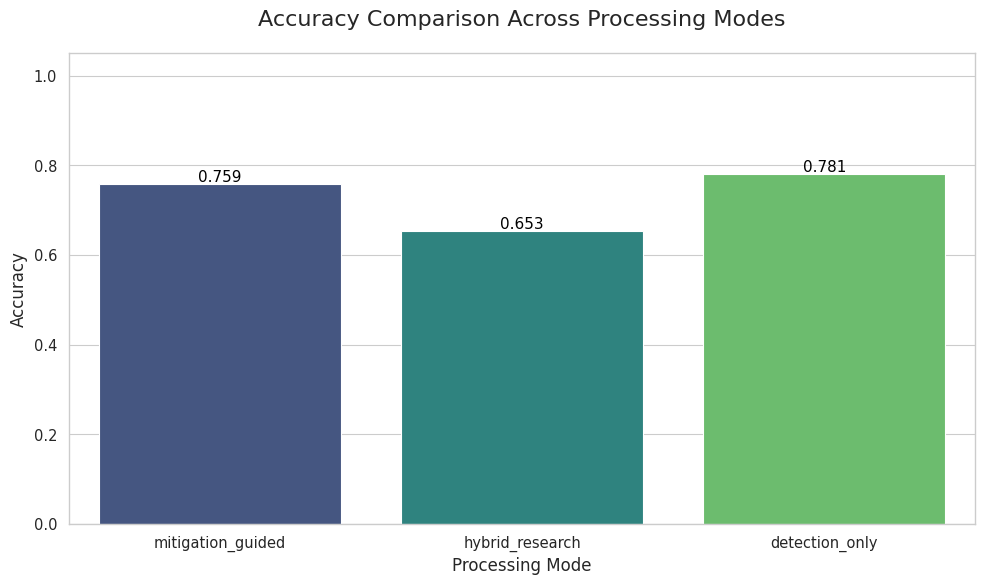

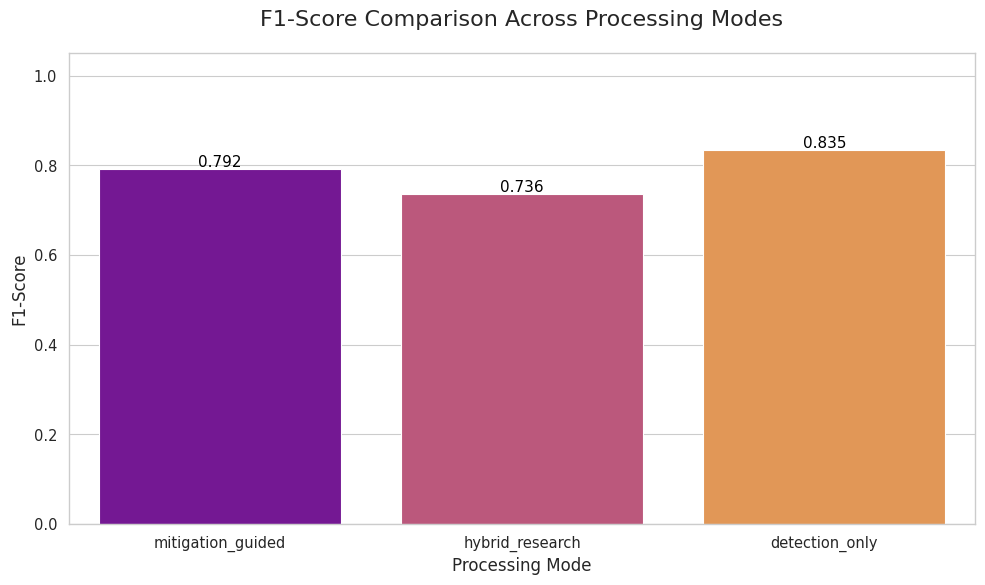

In [11]:
if not df.empty:
    # --- Calculate Metrics ---
    metrics_summary = []

    for mode in processing_modes:
        df_mode = df[df['processing_mode'] == mode]
        y_true = df_mode['ground_truth']
        y_pred = df_mode['ensemble_prediction']
        
        # Calculate metrics, using zero_division=0 to handle cases with no positives
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        
        metrics_summary.append({
            'Processing Mode': mode,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })

    # Convert the summary to a DataFrame for easy plotting and display
    metrics_df = pd.DataFrame(metrics_summary)

    # --- Print the Performance Report ---
    print("\n--- Performance Metrics Report ---")
    print(metrics_df.to_string(index=False))

    # --- Visualize Accuracy Comparison ---
    plt.figure(figsize=(10, 6))
    ax1 = sns.barplot(x='Processing Mode', y='Accuracy', data=metrics_df, palette='viridis')
    plt.title('Accuracy Comparison Across Processing Modes', fontsize=16, pad=20)
    plt.xlabel('Processing Mode', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.ylim(0, 1.05) # Set y-axis limit from 0 to 1.05 for better visualization

    # Add data labels on top of the bars
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                     textcoords='offset points')

    plt.tight_layout()
    plt.show()

    # --- Visualize F1-Score Comparison ---
    plt.figure(figsize=(10, 6))
    ax2 = sns.barplot(x='Processing Mode', y='F1-Score', data=metrics_df, palette='plasma')
    plt.title('F1-Score Comparison Across Processing Modes', fontsize=16, pad=20)
    plt.xlabel('Processing Mode', fontsize=12)
    plt.ylabel('F1-Score', fontsize=12)
    plt.ylim(0, 1.05)

    # Add data labels
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                     textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

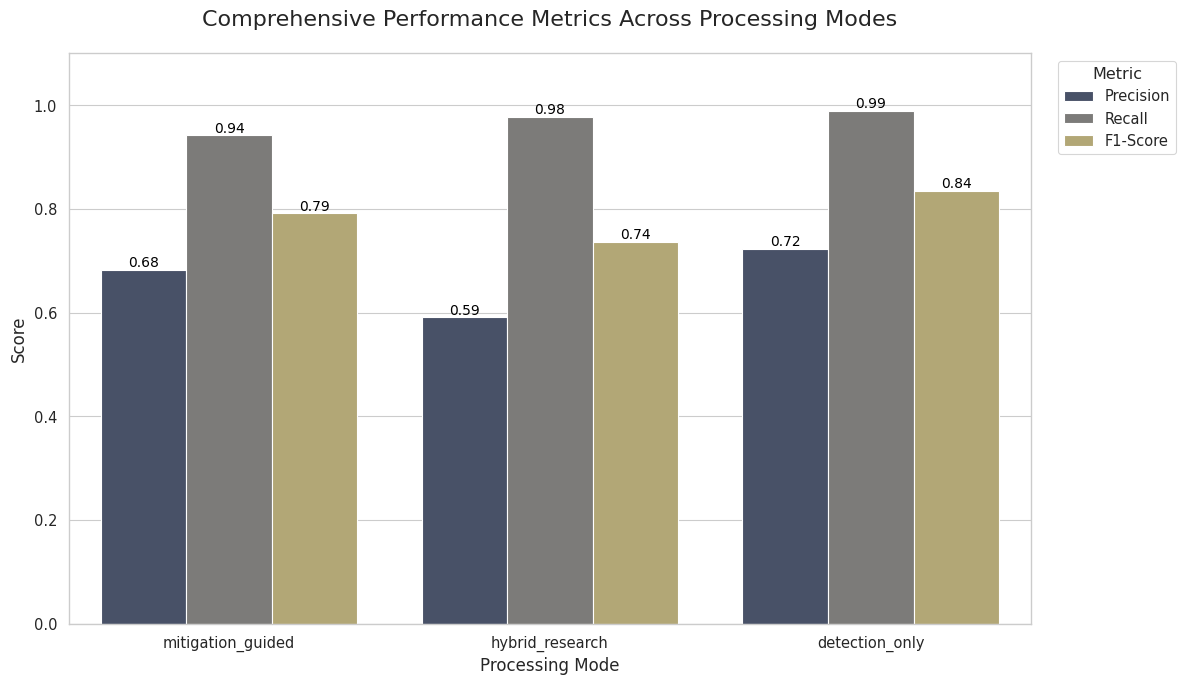

In [12]:
# This code assumes you have already run the setup code from the previous answer
# and have the 'metrics_df' DataFrame available.

if not metrics_df.empty:
    # "Melt" the DataFrame to a long format suitable for a grouped bar plot
    # We select only the key metrics for this visualization
    df_melted = metrics_df.melt(id_vars='Processing Mode', 
                                value_vars=['Precision', 'Recall', 'F1-Score'],
                                var_name='Metric', 
                                value_name='Score')

    # --- Create the Grouped Bar Plot ---
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(data=df_melted, x='Processing Mode', y='Score', hue='Metric', palette='cividis')

    # --- Add annotations and labels ---
    plt.title('Comprehensive Performance Metrics Across Processing Modes', fontsize=16, pad=20)
    plt.xlabel('Processing Mode', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.ylim(0, 1.1)
    plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')

    # Add data labels for each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

--- HELIOS Framework Performance ---
Accuracy:  0.739
Precision: 0.671
Recall:    0.970
F1-Score:  0.793
-----------------------------------


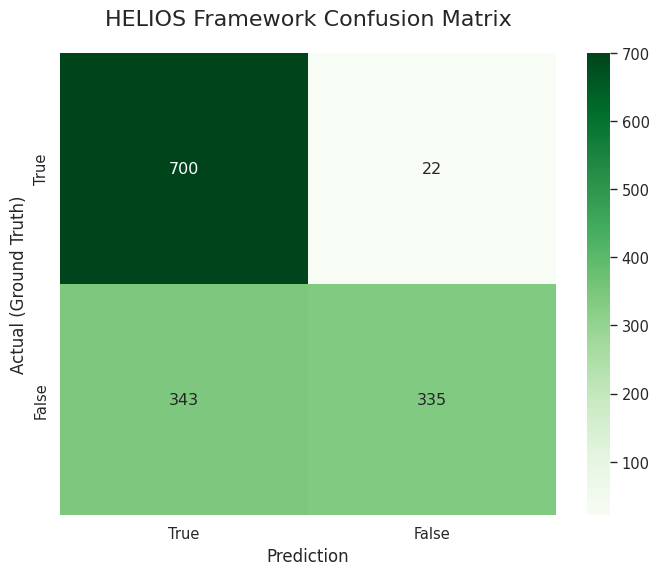

In [13]:


if not df.empty:
    # --- 1. Calculate Overall Metrics for the Entire Framework ---
    y_true_overall = df['ground_truth']
    y_pred_overall = df['ensemble_prediction']

    # Calculate the four key metrics on the entire dataset
    overall_accuracy = accuracy_score(y_true_overall, y_pred_overall)
    overall_precision = precision_score(y_true_overall, y_pred_overall, zero_division=0)
    overall_recall = recall_score(y_true_overall, y_pred_overall, zero_division=0)
    overall_f1 = f1_score(y_true_overall, y_pred_overall, zero_division=0)

    print("--- HELIOS Framework Performance ---")
    print(f"Accuracy:  {overall_accuracy:.3f}")
    print(f"Precision: {overall_precision:.3f}")
    print(f"Recall:    {overall_recall:.3f}")
    print(f"F1-Score:  {overall_f1:.3f}")
    print("-----------------------------------")

    # --- 2. Create the Overall Confusion Matrix Heatmap ---
    cm_overall = confusion_matrix(y_true_overall, y_pred_overall, labels=[True, False])

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_overall, annot=True, fmt='d', cmap='Greens',
                xticklabels=['True', 'False'],
                yticklabels=['True', 'False'])
    
    # Add title and labels
    plt.title('HELIOS Framework Confusion Matrix', fontsize=16, pad=20)
    plt.ylabel('Actual (Ground Truth)', fontsize=12)
    plt.xlabel('Prediction', fontsize=12)
    
    plt.show()

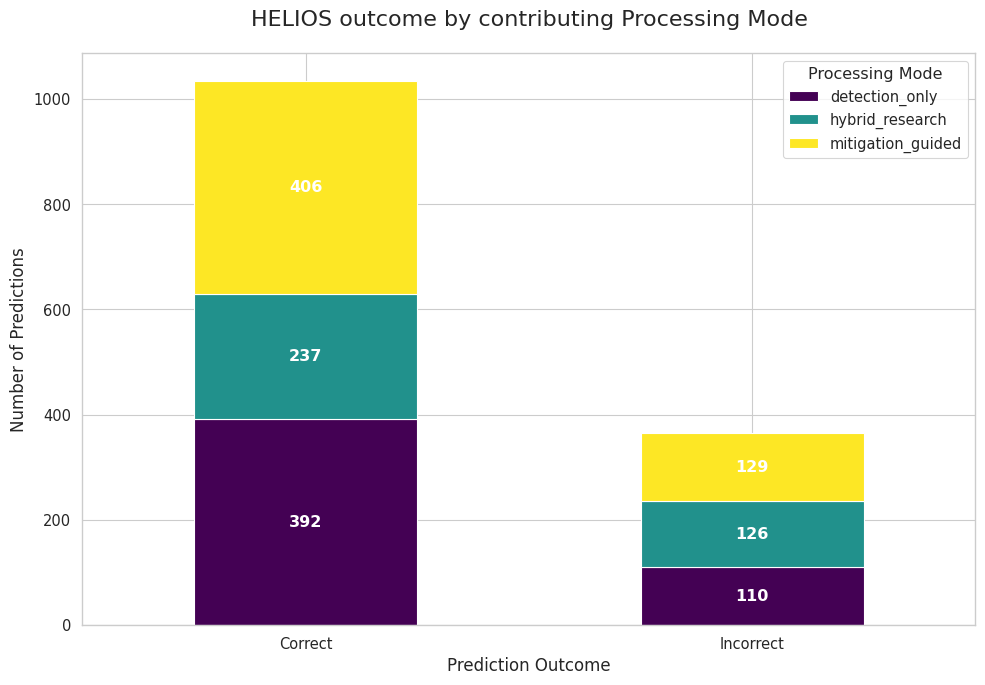

In [14]:
if not df.empty:
    # --- 1. Prepare the Data ---
    # We need to count the occurrences of correct/incorrect predictions for each mode.
    # We use the 'Result' column created in the previous answer.
    if 'Result' not in df.columns:
         df['Result'] = (df['ensemble_prediction'] == df['ground_truth']).map({True: 'Correct', False: 'Incorrect'})

    # Group by the result (Correct/Incorrect) and the processing mode, then count
    contribution_df = df.groupby(['Result', 'processing_mode']).size().reset_index(name='Count')
    
    # Pivot the table to get it into a format suitable for a stacked bar chart
    pivot_df = contribution_df.pivot(index='Result', columns='processing_mode', values='Count').fillna(0)
    
    # --- 2. Create the Stacked Bar Chart ---
    pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7), 
                  colormap='viridis', rot=0)

    # --- 3. Add Annotations and Labels ---
    plt.title('HELIOS outcome by contributing Processing Mode', fontsize=16, pad=20)
    plt.xlabel('Prediction Outcome', fontsize=12)
    plt.ylabel('Number of Predictions', fontsize=12)
    plt.legend(title='Processing Mode')

    # Add text labels on each segment of the stacked bars
    for c in plt.gca().containers:
        # The `label_type='center'` places the text in the middle of the bar segment
        plt.gca().bar_label(c, label_type='center', color='white', weight='bold')

    plt.tight_layout()
    plt.show()

--- Starting Visualization from WIDE Format CSV File ---
Successfully loaded '/kaggle/input/final-result/helios_adaptive_results_1400.csv' for analysis.
Data contains 1400 rows (one per query).
Analyzing 'KGR': Found 1400 queries where it was run.
Analyzing 'CoVE': Found 1400 queries where it was run.
Analyzing 'Stitch': Found 1400 queries where it was run.
Analyzing 'InterrogateLLM': Found 1400 queries where it was run.

Calculated Performance Metrics for Visualization:
             Component  F1-Score  Precision    Recall
0  Ensemble (Adaptive)  0.793201   0.671141  0.969529
1                  KGR  0.028446   0.067708  0.018006
2                 CoVE  0.763040   0.825806  0.709141
3               Stitch  0.678622   0.514674  0.995845
4       InterrogateLLM  0.677985   0.560688  0.857341


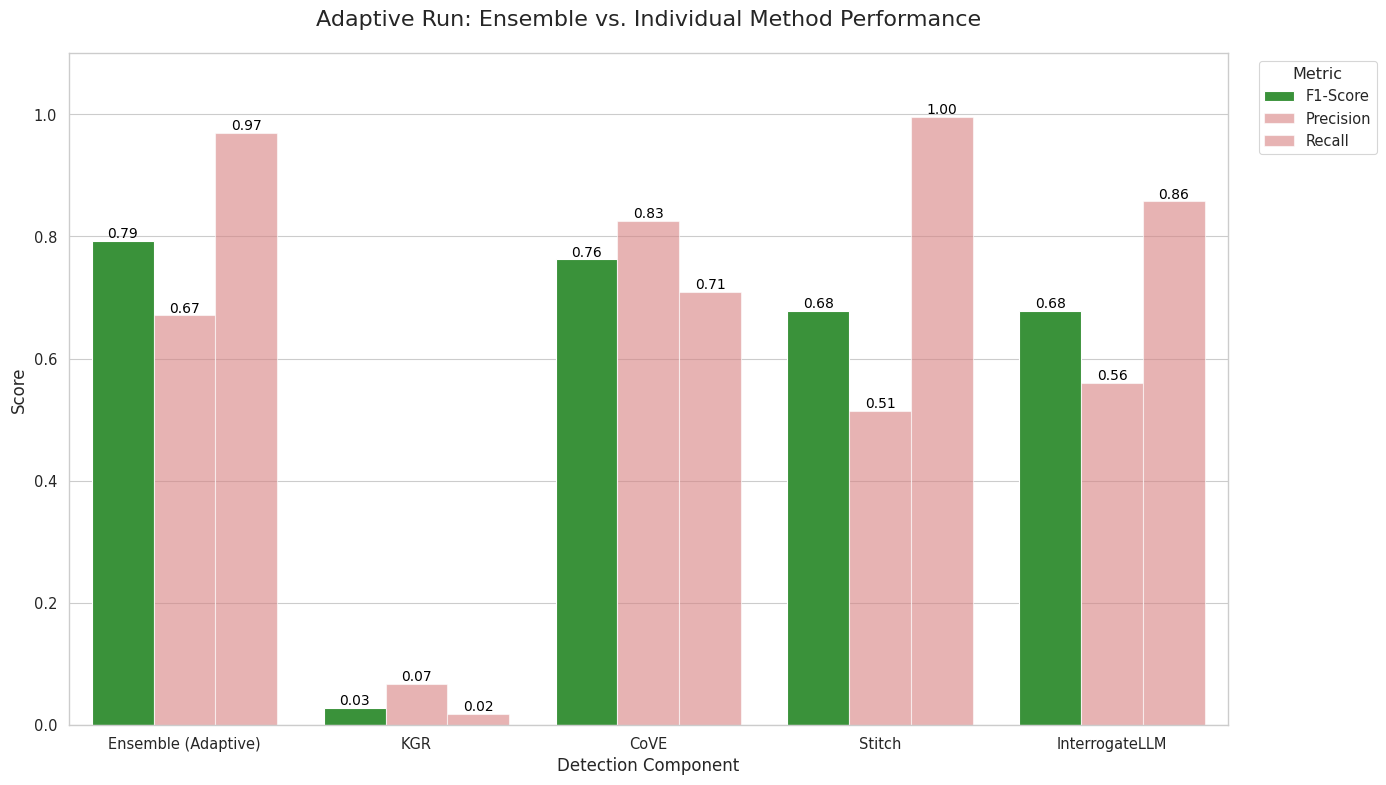

In [16]:
# ==============================================================================
# CORRECTED CELL FOR VISUALIZING ADAPTIVE RUN RESULTS FROM A "WIDE" FORMAT CSV
# This version uses custom colors and opacity to highlight the F1-Score
# and ensures Precision/Recall have a faded, light transparent effect.
# ==============================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score

print("--- Starting Visualization from WIDE Format CSV File ---")

# --- 1. Load the wide-format results file ---
file_path = '/kaggle/input/final-result/helios_adaptive_results_1400.csv'

try:
    df_wide = pd.read_csv(file_path)
    print(f"Successfully loaded '{file_path}' for analysis.")
    print(f"Data contains {df_wide.shape[0]} rows (one per query).")
except FileNotFoundError:
    print(f"ERROR: The file '{file_path}' was not found.")
    print("Please make sure the main script has run successfully.")
    df_wide = pd.DataFrame()

if not df_wide.empty:
    # Set a professional plot style suitable for papers
    sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)

    # --- 2. Calculate Metrics Accurately ---
    performance_data = []
    
    # Calculate overall Ensemble performance
    y_true_full_dataset = df_wide['ground_truth'].astype(bool)
    y_pred_ensemble = df_wide['ensemble_prediction'].astype(bool)
    
    performance_data.append({
        'Component': 'Ensemble (Adaptive)',
        'F1-Score': f1_score(y_true_full_dataset, y_pred_ensemble, zero_division=0),
        'Precision': precision_score(y_true_full_dataset, y_pred_ensemble, zero_division=0),
        'Recall': recall_score(y_true_full_dataset, y_pred_ensemble, zero_division=0)
    })
    
    # Calculate performance for each individual method correctly
    all_methods = ['KGR', 'CoVE', 'Stitch', 'InterrogateLLM']
    for method_name in all_methods:
        prediction_column = f'{method_name}_prediction'
        method_subset_df = df_wide.dropna(subset=[prediction_column])
        
        print(f"Analyzing '{method_name}': Found {len(method_subset_df)} queries where it was run.")
        
        if not method_subset_df.empty:
            y_true_method = method_subset_df['ground_truth'].astype(bool)
            y_pred_method = method_subset_df[prediction_column].astype(bool)
            
            performance_data.append({
                'Component': method_name,
                'F1-Score': f1_score(y_true_method, y_pred_method, zero_division=0),
                'Precision': precision_score(y_true_method, y_pred_method, zero_division=0),
                'Recall': recall_score(y_true_method, y_pred_method, zero_division=0)
            })

    # --- 3. Create the Plot with Desired Colors and Transparency ---
    perf_df = pd.DataFrame(performance_data)
    print("\nCalculated Performance Metrics for Visualization:")
    print(perf_df.to_string())

    # Melt DataFrame for Seaborn
    df_melted = perf_df.melt(
        id_vars='Component', 
        value_vars=['F1-Score', 'Precision', 'Recall'],
        var_name='Metric', 
        value_name='Score'
    )

    # Define a palette with a lighter red for Precision and Recall
    palette_colors = {
        'F1-Score': '#2ca02c',   # Solid green
        'Precision': '#e57373',  # Light red
        'Recall': '#e57373'      # Light red
    }

    plt.figure(figsize=(14, 8))
    ax = sns.barplot(
        data=df_melted,
        x='Component',
        y='Score',
        hue='Metric',
        palette=palette_colors,
        # Set a default low alpha; we will override F1-Score to be opaque
        alpha=0.6 
    )

    # --- Make F1-Score fully opaque and keep others transparent ---
    # This approach is more robust than checking colors
    for patch, metric in zip(ax.patches, df_melted['Metric']):
        if metric == 'F1-Score':
            patch.set_alpha(1.0) # Full opacity for F1-Score

    plt.title('Adaptive Run: Ensemble vs. Individual Method Performance', fontsize=16, pad=20)
    plt.xlabel('Detection Component', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.ylim(0, 1.1)
    plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')

    # Annotate each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()